### All days of the challange:

* [Day 1: Handling missing values](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)
* [Day 2: Scaling and normalization](https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data)
* [Day 3: Parsing dates](https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates/)
* [Day 4: Character encodings](https://www.kaggle.com/rtatman/data-cleaning-challenge-character-encodings/)
* [Day 5: Inconsistent Data Entry](https://www.kaggle.com/rtatman/data-cleaning-challenge-inconsistent-data-entry/)
___
Welcome to day 1 of the 5-Day Data Challenge! Today, we're going to be looking at how to deal with missing values. To get started, click the blue "Fork Notebook" button in the upper, right hand corner. This will create a private copy of this notebook that you can edit and play with. Once you're finished with the exercises, you can choose to make your notebook public to share with others. :)

> **Your turn!** As we work through this notebook, you'll see some notebook cells (a block of either code or text) that has "Your Turn!" written in it. These are exercises for you to do to help cement your understanding of the concepts we're talking about. Once you've written the code to answer a specific question, you can run the code by clicking inside the cell (box with code in it) with the code you want to run and then hit CTRL + ENTER (CMD + ENTER on a Mac). You can also click in a cell and then click on the right "play" arrow to the left of the code. If you want to run all the code in your notebook, you can use the double, "fast forward" arrows at the bottom of the notebook editor.

Here's what we're going to do today:

* [Take a first look at the data](#Take-a-first-look-at-the-data)
* [See how many missing data points we have](#See-how-many-missing-data-points-we-have)
* [Figure out why the data is missing](#Figure-out-why-the-data-is-missing)
* [Drop missing values](#Drop-missing-values)
* [Filling in missing values](#Filling-in-missing-values)

Let's get started!

# Take a first look at the data
________

The first thing we'll need to do is load in the libraries and datasets we'll be using. For today, I'll be using a dataset of events that occured in American Football games for demonstration, and you'll be using a dataset of building permits issued in San Francisco.

> **Important!** Make sure you run this cell yourself or the rest of your code won't work!

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# read in all our data
nfl_data = pd.read_csv("../input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv")
sf_permits = pd.read_csv("../input/building-permit-applications-data/Building_Permits.csv")

# set seed for reproducibility
np.random.seed(0) 

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The first thing I do when I get a new dataset is take a look at some of it. This lets me see that it all read in correctly and get an idea of what's going on with the data. In this case, I'm looking to see if I see any missing values, which will be reprsented with `NaN` or `None`.

In [2]:
# look at a few rows of the nfl_data file. I can see a handful of missing data already!
nfl_data.sample(5)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
244485,2014-10-26,2014102607,18,3,1.0,00:39,1,939.0,12.0,TB,...,1.240299,0.225647,0.774353,0.245582,0.754418,0.225647,0.019935,-0.018156,0.038091,2014
115340,2011-11-20,2011112000,22,4,1.0,06:47,7,407.0,44.0,OAK,...,NaN,0.056036,0.943964,0.042963,0.957037,0.943964,0.013073,NaN,NaN,2011
68357,2010-11-14,2010111401,8,2,NaN,00:23,1,1823.0,0.0,CLE,...,NaN,0.365307,0.634693,0.384697,0.615303,0.634693,-0.019390,NaN,NaN,2010
368377,2017-09-24,2017092405,24,4,1.0,08:48,9,528.0,8.0,CLE,...,1.075660,0.935995,0.064005,0.921231,0.078769,0.064005,0.014764,0.003866,0.010899,2017
384684,2017-11-05,2017110505,11,2,1.0,09:15,10,2355.0,0.0,DEN,...,NaN,0.928474,0.071526,0.934641,0.065359,0.071526,-0.006166,NaN,NaN,2017


Yep, it looks like there's some missing values. What about in the sf_permits dataset?

In [4]:
# your turn! Look at a couple of rows from the sf_permits dataset. Do you notice any missing data?
sf_permits.isnull().sum()

# your code goes here :)

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

# See how many missing data points we have
___

Ok, now we know that we do have some missing values. Let's see how many we have in each column. 

In [5]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [6]:
# how many total missing values do we have?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

24.87214126835169

Wow, almost a quarter of the cells in this dataset are empty! In the next step, we're going to take a closer look at some of the columns with missing values and try to figure out what might be going on with them.

In [8]:
# your turn! Find out what percent of the sf_permits dataset is missing
total_cells2 = np.product(sf_permits.shape)
total_missing2 = sf_permits.isnull().sum().sum()

(total_missing2 / total_cells2 * 100)

26.26002315058403

# Figure out why the data is missing
____
 
This is the point at which we get into the part of data science that I like to call "data intution", by which I mean "really looking at your data and trying to figure out why it is the way it is and how that will affect your analysis". It can be a frustrating part of data science, especially if you're newer to the field and don't have a lot of experience. For dealing with missing values, you'll need to use your intution to figure out why the value is missing. One of the most important question you can ask yourself to help figure this out is this:

> **Is this value missing becuase it wasn't recorded or becuase it dosen't exist?**

If a value is missing becuase it doens't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probalby do want to keep as NaN. On the other hand, if a value is missing becuase it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. (This is called "imputation" and we'll learn how to do it next! :)

Let's work through an example. Looking at the number of missing values in the nfl_data dataframe, I notice that the column `TimesSec` has a lot of missing values in it: 

In [9]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

By looking at [the documentation](https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016), I can see that this column has information on the number of seconds left in the game when the play was made. This means that these values are probably missing because they were not recorded, rather than because they don't exist. So, it would make sense for us to try and guess what they should be rather than just leaving them as NA's.

On the other hand, there are other fields, like `PenalizedTeam` that also have lot of missing fields. In this case, though, the field is missing because if there was no penalty then it doesn't make sense to say *which* team was penalized. For this column, it would make more sense to either leave it empty or to add a third value like "neither" and use that to replace the NA's.

> **Tip:** This is a great place to read over the dataset documentation if you haven't already! If you're working with a dataset that you've gotten from another person, you can also try reaching out to them to get more information.

If you're doing very careful data analysis, this is the point at which you'd look at each column individually to figure out the best strategy for filling those missing values. For the rest of this notebook, we'll cover some "quick and dirty" techniques that can help you with missing values but will probably also end up removing some useful information or adding some noise to your data.

## Your turn!

* Look at the columns `Street Number Suffix` and `Zipcode` from the `sf_permits` datasets. Both of these contain missing values. Which, if either, of these are missing because they don't exist? Which, if either, are missing because they weren't recorded?

In [14]:
sf_permits[['Street Number Suffix', 'Zipcode']].head()

,Street Number Suffix,Zipcode
0,NaN,94102.0
1,NaN,94102.0
2,NaN,94109.0
3,NaN,94109.0
4,NaN,94102.0


In [22]:
print('Proportion of nulls in `Zipcode')
print(sf_permits['Zipcode'].isnull().sum() / len(sf_permits) * 100)

Proportion of nulls in `Zipcode
0.8627450980392156


In [21]:
print('Proportion of nulls in `Street Number Suffix` column')
print(sf_permits['Street Number Suffix'].isnull().sum() / len(sf_permits) * 100)

Proportion of nulls in `Street Number Suffix` column
98.88587229763701


### Note.
* `Street Number Suffix`
  * About 99% values in this column = `null`
  * `Street Number Suffix` : this column can be `null` since the value does not exist.
* `Zipcode`
  * About 86% values in this column = `null`
  * `Zipcode` must exist : this column seems available to be imputed.

# Drop missing values
___

If you're in a hurry or don't have a reason to figure out why your values are missing, one option you have is to just remove any rows or columns that contain missing values. 

### Note: I don't generally recommend this approch for important projects! 
It's usually worth it to take the time to go through your data and really look at all the columns with missing values one-by-one to really get to know your dataset.

If you're sure you want to drop rows with missing values, pandas does have a handy function, `dropna()` to help you do this. Let's try it out on our NFL dataset!

In [ ]:
# remove all the rows that contain a missing value
nfl_data.dropna()

Oh dear, it looks like that's removed all our data! 😱 This is because every row in our dataset had at least one missing value. We might have better luck removing all the *columns* that have at least one missing value instead.

In [23]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [24]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 41


We've lost quite a bit of data, but at this point we have successfully removed all the `NaN`'s from our data. 

In [32]:
# Your turn! Try removing all the rows from the sf_permits dataset that contain missing values. How many are left?
sf_permits.dropna().shape

### No row left.

(0, 43)

In [33]:
# Now try removing all the columns with empty values. Now how much of your data is left?
sf_permits.dropna(axis=1).shape

(198900, 12)

In [34]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % sf_permits.shape[1])
print("Columns with na's dropped: %d" % sf_permits.dropna(axis=1).shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12


# Filling in missing values automatically
_____

Another option is to try and fill in the missing values. For this next bit, I'm getting a small sub-section of the NFL data so that it will print well.

In [35]:
# get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


We can use the Panda's fillna() function to fill in missing values in a dataframe for us. One option we have is to specify what we want the `NaN` values to be replaced with. Here, I'm saying that I would like to replace all the `NaN` values with 0.

In [36]:
# replace all NA's with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


I could also be a bit more savvy and replace missing values with whatever value comes directly after it in the same column. (This makes a lot of sense for datasets where the observations have some sort of logical order to them.)

In [37]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
subset_nfl_data.fillna(method = 'bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


Filling in missing values is also known as "imputation", and you can find more exercises on it [in this lesson, also linked under the "More practice!" section](https://www.kaggle.com/dansbecker/handling-missing-values). First, however, why don't you try replacing some of the missing values in the sf_permit dataset?

In [39]:
# Your turn! Try replacing all the NaN's in the sf_permits data with the one that
# comes directly after it and then replacing any remaining NaN's with 0

sf_permits_imputed = sf_permits.fillna(method='bfill', axis=0).fillna(0)
sf_permits_imputed.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


And that's it for today! If you have any questions, be sure to post them in the comments below or [on the forums](https://www.kaggle.com/questions-and-answers). 

Remember that your notebook is private by default, and in order to share it with other people or ask for help with it, you'll need to make it public. First, you'll need to save a version of your notebook that shows your current work by hitting the "Commit & Run" button. (Your work is saved automatically, but versioning your work lets you go back and look at what it was like at the point you saved it. It also let's you share a nice compiled notebook instead of just the raw code.) Then, once your notebook is finished running, you can go to the Settings tab in the panel to the left (you may have to expand it by hitting the [<] button next to the "Commit & Run" button) and setting the "Visibility" dropdown to "Public".

# More practice!
___

If you're looking for more practice handling missing values, check out these extra-credit\* exercises:

* [Handling Missing Values](https://www.kaggle.com/dansbecker/handling-missing-values): In this notebook Dan shows you several approaches to imputing missing data using scikit-learn's imputer. 
* Look back at the `Zipcode` column in the `sf_permits` dataset, which has some missing values. How would you go about figuring out what the actual zipcode of each address should be? (You might try using another dataset. You can search for datasets about San Fransisco on the [Datasets listing](https://www.kaggle.com/datasets).) 

\* no actual credit is given for completing the challenge, you just learn how to clean data real good :P

### Additional Approach.
* Impute `Zipcode` column in `sf_permits` dataset

In [41]:
# List up all the columns in the `sf_permits` dataset
# Guess which column could be used to impute `Zipcode` related information.
sf_permits.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID'],
     

In [45]:
# store the columns that possibly have locational information.
loc_related_cols = ['Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Supervisor District', 'Neighborhoods - Analysis Boundaries',
       'Location']

# Check the actual values in dataset including `Zipcode` column

sf_permits[['Zipcode'] + loc_related_cols].head()

,Zipcode,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Supervisor District,Neighborhoods - Analysis Boundaries,Location
0,94102.0,0326,023,140,NaN,Ellis,St,NaN,NaN,3.0,Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,94102.0,0306,007,440,NaN,Geary,St,0.0,NaN,3.0,Tenderloin,"(37.78733980600732, -122.41063199757738)"
2,94109.0,0595,203,1647,NaN,Pacific,Av,NaN,NaN,3.0,Russian Hill,"(37.7946573324287, -122.42232562979227)"
3,94109.0,0156,011,1230,NaN,Pacific,Av,0.0,NaN,3.0,Nob Hill,"(37.79595867909168, -122.41557405519474)"
4,94102.0,0342,001,950,NaN,Market,St,NaN,NaN,6.0,Tenderloin,"(37.78315261897309, -122.40950883997789)"


In [46]:
# Let's investigate trying some random combinations of columns.

comb1 = ['Zipcode', 'Block', 'Street Number', 'Street Name', 'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Location']
sf_permits_comb1 = sf_permits[comb1]

In [48]:
sf_permits_comb1.head()

,Zipcode,Block,Street Number,Street Name,Supervisor District,Neighborhoods - Analysis Boundaries,Location
0,94102.0,0326,140,Ellis,3.0,Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,94102.0,0306,440,Geary,3.0,Tenderloin,"(37.78733980600732, -122.41063199757738)"
2,94109.0,0595,1647,Pacific,3.0,Russian Hill,"(37.7946573324287, -122.42232562979227)"
3,94109.0,0156,1230,Pacific,3.0,Nob Hill,"(37.79595867909168, -122.41557405519474)"
4,94102.0,0342,950,Market,6.0,Tenderloin,"(37.78315261897309, -122.40950883997789)"


In [103]:
sf_permits_comb1.isnull().sum()

Zipcode                                1716
Block                                     0
Street Number                             0
Street Name                               0
Supervisor District                    1717
Neighborhoods - Analysis Boundaries    1725
Location                               1700
Location_lat                           1700
Location_lon                           1700
dtype: int64

In [50]:
sf_permits_comb1[sf_permits_comb1['Zipcode']==94102].head(15)

,Zipcode,Block,Street Number,Street Name,Supervisor District,Neighborhoods - Analysis Boundaries,Location
0,94102.0,0326,140,Ellis,3.0,Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,94102.0,0306,440,Geary,3.0,Tenderloin,"(37.78733980600732, -122.41063199757738)"
4,94102.0,0342,950,Market,6.0,Tenderloin,"(37.78315261897309, -122.40950883997789)"
11,94102.0,0829,675,Fell,5.0,Hayes Valley,"(37.774914087334544, -122.42886839796792)"
29,94102.0,0326,165,Powell,3.0,Tenderloin,"(37.78625524960107, -122.40834431815433)"
71,94102.0,0327,165,Ofarrell,3.0,Financial District/South Beach,"(37.78622455286341, -122.40734672057884)"
106,94102.0,0856,115,Haight,5.0,Hayes Valley,"(37.77261380729689, -122.4242148174291)"
119,94102.0,0327,1,Stockton,3.0,Financial District/South Beach,"(37.78584544618807, -122.40652160493985)"
142,94102.0,0297,515,Mason,3.0,Nob Hill,"(37.78831830234988, -122.41054888775284)"
157,94102.0,0805,700,Hayes,5.0,Hayes Valley,"(37.7764535995205, -122.42813162705657)"


In [104]:
sf_permits_comb1[sf_permits_comb1['Zipcode']==94102]['Block'].unique()

array(['0326', '0306', '0342', '0829', '0327', '0856', '0297', '0805',
       '0762', '0317', '0307', '0744', '0349', '0324', '0853', '0318',
       '0346', '0768', '0872', '0832', '0830', '0348', '0742', '0816',
       '0839', '0834', '0793', '0336', '0339', '0331', '0852', '0315',
       '0743', '0819', '0807', '0855', '0814', '0858', '0835', '0305',
       '0837', '0296', '0314', '0840', '0869', '0806', '0344', '0341',
       '0350', '0813', '0763', '0345', '0785', '0332', '0340', '0343',
       '0329', '0841', '0337', '0838', '0765', '0353', '0323', '0857',
       '0808', '0316', '0782', '0817', '0831', '0330', '0781', '0338',
       '0809', '318', '0854', '0871', '0818', '0792', '0325', '0851',
       '0870', '0811', '0333', '0761', '0759', '0794', '0810', '0351',
       '0741', '0347', '0355', '0786A', '0795', '0833', '0836', '0820',
       '0787', '0788', '0766', '0770', '0354', '0815', '0767', '0783',
       '829', '0812', '0850', '0764', '0796'], dtype=object)

In [106]:
sf_permits_comb1.groupby('Zipcode')['Block'].apply(lambda x: (len(x.unique()), x.unique()))

Zipcode
94102.0    (109, [0326, 0306, 0342, 0829, 0327, 0856, 029...
94103.0    (117, [3545, 3728, 3509, 3780, 3555, 3521, 373...
94104.0    (15, [0268, 0240, 0239, 0259, 0289, 0260, 0267...
94105.0    (36, [3749, 3707, 3738, 3708, 3768, 3711, 3721...
94107.0    (177, [4105, 8702, 3763, 4097, 3995, 3786, 378...
94108.0    (56, [0243, 0328, 0295, 0222A, 0189, 0212, 031...
94109.0    (185, [0595, 0156, 0024, 0299, 0640, 0249, 018...
94110.0    (395, [6529, 3610, 6597, 3590, 4024, 5666, 570...
94111.0    (54, [0196, 0208, 0229, 0237, 0227, 0263, 0262...
94112.0    (497, [6780, 6969, 6404, 3206, 3147, 7104, 703...
94114.0    (194, [3541, 6537, 3621, 2659, 3580, 6551, 261...
94115.0    (201, [1049, 0749, 0605, 1095, 0579, 1094, 115...
94116.0    (319, [2417, 2402, 2199, 2307, 2346, 2503A, 21...
94117.0    (181, [1212, 1259, 1176, 1193, 0797, 1252, 122...
94118.0    (224, [1429, 1558, 1431, 0991, 0993, 1041, 141...
94121.0    (226, [1449, 1572, 1609, 1676, 1497, 1510, 137...
94122.0    (317,

### We can assume that each unique `Zipcode` includes unique `Block` values.
* Since `Block` has no `null` value , we can impute `Zipcode` according to the value of `Block`.

In [126]:
# Store the upper information & reset index to extract the zipcode values as columns
blocks_by_zipcode = sf_permits_comb1.groupby('Zipcode')['Block'].apply(lambda x: x.unique()).reset_index()
blocks_by_zipcode

# write a function to impute
# test variables to check the result validity.
def zipcode_imputer_by_block(block_):
    zipcodes = []
    
    # Find the zipcode which includes the given block number.
    for i, bnums in enumerate(blocks_by_zipcode['Block']):
        if block_ in bnums:
            #return blocks_by_zipcode['Zipcode'][i]
            zipcodes.append(blocks_by_zipcode['Zipcode'][i])
            
    if len(zipcodes) == 1:
        return zipcodes[0]
    
    elif len(zipcodes) > 1:
        print('duplicated block number!')
        return zipcodes
    
    else:
        # if there does not exist the given block number, return None.
        print('blocknum not found!')
        return []
    
# get the row index where the `Zipcode` value is None / null
#sf_permits[sf_permits['Zipcode'].isnull()]['Zipcode'] = 

sf_permits_zipcode_imputed1 = sf_permits[sf_permits['Zipcode'].isnull()]['Block'].apply(zipcode_imputer_by_block)

duplicated block number!
duplicated block number!
duplicated block number!
duplicated block number!
duplicated block number!
duplicated block number!
duplicated block number!
blocknum not found!
duplicated block number!
duplicated block number!
blocknum not found!
blocknum not found!
duplicated block number!
duplicated block number!
blocknum not found!
blocknum not found!
duplicated block number!
duplicated block number!
blocknum not found!
blocknum not found!
duplicated block number!
duplicated block number!
blocknum not found!
duplicated block number!
blocknum not found!
blocknum not found!
duplicated block number!
duplicated block number!
duplicated block number!
duplicated block number!
duplicated block number!
blocknum not found!
duplicated block number!
duplicated block number!
duplicated block number!
blocknum not found!
duplicated block number!
blocknum not found!
blocknum not found!
blocknum not found!
blocknum not found!
duplicated block number!
duplicated block number!
dupli

#### Since the entire values in `Zipcode` were not imputed, we execute imputation again with `Street Number` column again.
* Firstly, filter the undecided values (`null` or `list type value`) and get their row indices.

In [158]:
# indices for the undecided values from the above
undecided_indices_filter1 = sf_permits_zipcode_imputed1.apply(lambda x: x if type(x) == list else np.nan).dropna().index
undecided_indices_filter1

Int64Index([  1215,   4610,  14008,  15195,  18374,  19320,  20307,  21593,
             23777,  25787,  26897,  27570,  27762,  29528,  31295,  31298,
             31893,  33410,  37920,  39527,  39984,  39987,  42279,  45482,
             51215,  52770,  54982,  56377,  58628,  58630,  59438,  59657,
             63651,  63656,  64174,  65608,  66754,  69027,  71326,  74969,
             78315,  80990,  80994,  88152,  90760,  90972,  91494,  92845,
             93255,  93995,  95136, 102474, 110750, 114393, 114394, 114397,
            116164, 116371, 116703, 116734, 122389, 122391, 122716, 129989,
            132277, 135277, 135871, 137002, 148990, 149710, 149713, 157069,
            157072, 157428, 160942, 161027, 161482, 195810, 198895],
           dtype='int64')

In [159]:
# 79 rows
sf_permits.loc[undecided_indices_filter1].shape

(79, 43)

In [160]:
# Store the upper information & reset index to extract the zipcode values as columns
stnums_by_zipcode = sf_permits_comb1.groupby('Zipcode')['Street Number'].apply(lambda x: x.unique()).reset_index()
stnums_by_zipcode

# write a function to impute
# test variables to check the result validity.
def zipcode_imputer_by_stnums(stnum_):
    zipcodes = []
    
    # Find the zipcode which includes the given block number.
    for i, stnums in enumerate(stnums_by_zipcode['Street Number']):
        if stnum_ in stnums:
            #return blocks_by_zipcode['Zipcode'][i]
            zipcodes.append(stnums_by_zipcode['Zipcode'][i])
            
    if len(zipcodes) == 1:
        return zipcodes[0]
    
    elif len(zipcodes) > 1:
        print('duplicated streeet number!')
        return zipcodes
    
    else:
        # if there does not exist the given block number, return None.
        print('street number not found!')
        return []

In [161]:
sf_permits_zipcode_imputed2 = sf_permits.loc[undecided_indices_filter1]['Street Number'].apply(zipcode_imputer_by_stnums)

duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
duplicated streeet number!
d

In [163]:
# All 79 values cannot be seperated by Street Number.
sf_permits_zipcode_imputed2.apply(lambda x: 1 if type(x) == list else 0).sum()

79

* `Location` numerical value boundaries by each `Zipcode`
  * To calculate easier, we need to divide the latitude / longitude metrics into two seperated columns.

In [76]:
def sep_longlat(location_value):
    
    if type(location_value) == float:
        return None, None
    
    sep_first = location_value.split(',')
    longitude = float(sep_first[0][1:])
    latitude = float(sep_first[1][1:-1])
    
    return longitude, latitude

In [80]:
# Seperate `Location` information into two columns (type - float)
location_converted = sf_permits['Location'].apply(sep_longlat)
sf_permits_comb1['Location_lat'] = location_converted.apply(lambda x: x[0])
sf_permits_comb1['Location_lon'] = location_converted.apply(lambda x: x[1])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [81]:
sf_permits_comb1.head()

,Zipcode,Block,Street Number,Street Name,Supervisor District,Neighborhoods - Analysis Boundaries,Location,Location_lat,Location_lon
0,94102.0,0326,140,Ellis,3.0,Tenderloin,"(37.785719256680785, -122.40852313194863)",37.785719,-122.408523
1,94102.0,0306,440,Geary,3.0,Tenderloin,"(37.78733980600732, -122.41063199757738)",37.787340,-122.410632
2,94109.0,0595,1647,Pacific,3.0,Russian Hill,"(37.7946573324287, -122.42232562979227)",37.794657,-122.422326
3,94109.0,0156,1230,Pacific,3.0,Nob Hill,"(37.79595867909168, -122.41557405519474)",37.795959,-122.415574
4,94102.0,0342,950,Market,6.0,Tenderloin,"(37.78315261897309, -122.40950883997789)",37.783153,-122.409509


In [89]:
sf_permits_comb1.groupby('Zipcode')['Location_lat'].apply(lambda x: (x.min(), x.max()))

Zipcode
94102.0    (37.769941399353016, 37.788990784523925)
94103.0      (37.76368837139221, 37.78717550018728)
94104.0      (37.78824234417909, 37.79386286998276)
94105.0     (37.78412992064034, 37.794426938897814)
94107.0       (37.7499504072153, 37.78546640744854)
94108.0      (37.78608527086759, 37.79595658161159)
94109.0       (37.78233414512198, 37.8079507836605)
94110.0    (37.731915229398915, 37.765478778682095)
94111.0     (37.79157575173518, 37.805288974429395)
94112.0     (37.708255336721685, 37.73524427149501)
94114.0     (37.748021195448196, 37.76996415188011)
94115.0      (37.77712581184931, 37.79462805511952)
94116.0    (37.734104199116366, 37.754403863800874)
94117.0     (37.75863403890969, 37.778376052042105)
94118.0     (37.773153319712996, 37.79175623044793)
94121.0      (37.7716790861803, 37.789913818009396)
94122.0     (37.751156191661785, 37.76936858304985)
94123.0     (37.79314118457848, 37.808167135676854)
94124.0      (37.71179555128596, 37.75233235041668)
9412

In [168]:
from matplotlib import pyplot as plt

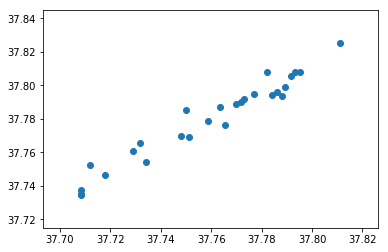

In [170]:
plt.scatter(sf_permits_comb1.groupby('Zipcode')['Location_lat'].apply(lambda x: x.min()),
           sf_permits_comb1.groupby('Zipcode')['Location_lat'].apply(lambda x: x.max()))